<h2><center> <span style = "font-family: Babas; font-size: 2em;">ZENODO Product Classification NLP </span> </center></h2>
<h4><center> <span style = "font-family: Babas; font-size: 2em;"> 100674538 </span> </center></h4>

<h4><center> <span style = "font-family: Babas; font-size: 2em;"> PART 1[EDA] </span> </center></h4>

### Overview

The objective of the project is to classify **online prducts** into four categories, based on its description available in the  platforms. The categories are: `Electronics`, `Household`, `Books`, and `Clothing & Accessories`. We carried out the following steps in this notebook:

- Performed basic **exploratory data analysis**, comparing the distributions of the number of characters, number of words, and average word-length of descriptions of products from different categories

- Employed several **text normalization** techniques, namely *convertion to lowercase*, *removal of whitespaces*, *removal of punctuations*, *removal of unicode characters*, *substitution of acronyms*, *substitution of contractions*, *removal of stop words*, *stemming and lemmatization*, *discardment of non-alphabetic words*, *retainment of relevant parts of speech*, *removal of additional stop words*

- Combined the processes in an appropriate order into a single function that takes a text as input and outputs a normalized version of that text

- Implemented text normalization on product descriptions in the given dataset

---

### Contents

- **Introduction**
    - E-commerce Product Categorization
    - Text Classification
    - Data
    - Project Objective
- **Exploratory Data Analysis**
    - Class Frequencies
    - Number of Characters
    - Number of Words
    - Average Word-length
- **Text Normalization**
    - Convertion to Lowercase
    - Removal of Whitespaces
    - Removal of Punctuations
    - Removal of Unicode Characters
    - Substitution of Acronyms
    - Substitution of Contractions
    - Removal of Stop Words
    - Spelling Correction
    - Stemming and Lemmatization
    - Discardment of Non-alphabetic Words
    - Retainment of Relevant Parts of Speech
    - Removal of Additional Stop Words
- **Integration of the Processes**



### Importing libraries

In [1]:
# File system manangement
import time, psutil, os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
!pip install catboost
import catboost as ctb
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Deep learning
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense


# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Others
import gensim
from sklearn.decomposition import TruncatedSVD


# Others
import json

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


### Runtime and memory usage

In [3]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

# Introduction

- **Product Categorization**
- **Text Classification**
- **Data**
- **Project Objective**

## Product Categorization

**Product Catgorization** (online commerce) is the activity of electronically buying or selling of products on online services or over the **Internet**. It frequently uses the **web**, if not entirely, for at least some of the life cycle of a transaction, while it may also use other technologies like **e-mail**. Typical e-commerce transactions include the purchase of products (like books from Amazon) or services (such as music downloads in the form of digital distribution such as the iTunes Store). **Online retail**, **electronic markets**, and **online auctions** are the three areas of e-commerce. 

**Product categorization** or **product classification**  refers to a system of categories into which a collection of products would fall under. Product categorization involves two separate tasks:

- Create, support, and expand the catalogue structure for the offered products

- Tagging products with the correct categories and attributes

While machine learning does not have much potential for use in the first task, it is possible to automate the second task, which is relatively laborious and time-consuming. **The problem considered in this notebook involves the categorization of products offered on online platforms based on the descriptions of the products mentioned therein.** The purpose of such categorization is to enhance the user experience and achieve better results with external search engines. Visitors can quickly find the products they need by navigating the catalogue or using the website's search engine.

## Text Classification

**Text classification** is a widely used **natural language processing** task in different business problems. Given a statement or document, the task involves assigning to it an appropriate category from a pre-defined set of categories. The dataset of choice determines the set of categories. Text classification has applications in emotion classification, news classification, spam email detection, auto-tagging of customer queries etc.

In the present problem, the statements are the product descriptions and the categories are `Electronics`, `Household`, `Books` and `Clothing & Accessories`.

## Data

The dataset has been scraped from a variety of  e-commerce platform(s). It contains e-commerce text data for four categories: `Electronics`, `Household`, `Books` and `Clothing & Accessories`. The dataset is in *.csv* format and consists of two columns. The first column gives the target class name and the second column gives the datapoint, which is the description of the product from the website. We insert column names and exchanged the columns, to put the target column at the right.

In [86]:
# Loading and customizing the data
data = pd.read_csv(
    'products_kaggle.csv', 
    names = ['label', 'description']
)
data = data[['description', 'label']]

print(pd.Series({"Dataset shape": "{}".format(data.shape)}).to_string())
data

Dataset shape    (50425, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household
...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,Electronics
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,Electronics
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,Electronics
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",Electronics


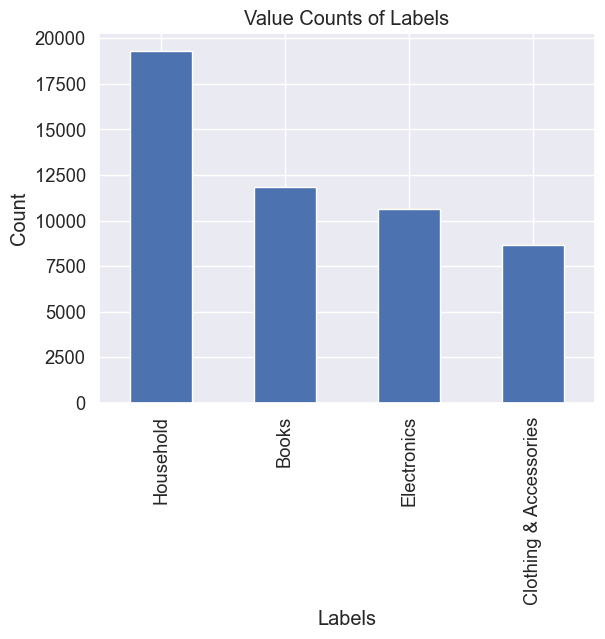

In [87]:
data['label'].value_counts().plot(kind='bar')
plt.title('Value Counts of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [88]:
data.label.value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [89]:
# Example description @33333 row

data['description'].iloc[33333]

'QRAFTINK No Show Socks for Women & Girls | Premium Mercerised Cotton Unisex Loafer Socks for Daily Use & Sports | Fits Upto UK Size 10, US Size 12 & Euro Size 45 | Combo of 4 Liner Socks Qraftink no show socks are unisex loafer/liner socks in three different colour code pairs. These are made available for you in very vibrant colours after a lot of research. The socks are made of premium mercerised cotton, which is soft and keeps your feet dry and cool at the same time. The socks are designed in a fashion that will give you a great experience. Silicon system is installed in every pair of socks to give you a great hold while you are walking or doing a sporting activity. It is designed keeping in mind the Indian feet. It can stretch upto UK size 10, US size 12 and Euro size 45. There is a well-knitted arch band to keep the socks in place and Y-head to improve the fit. We have put in a great amount of R & D to develop these socks. Our mission is to create a global Yoga and sports brand, o

In [90]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values        1
Number of duplicate observations              22622


In [91]:
data.dropna(inplace = True) # Dropping observations with missing values
data.drop_duplicates(inplace = True) # Dropping duplicate observations
data.reset_index(drop = True, inplace = True) # Resetting index

In [92]:
#unique word count

unique_word_count = data['description'].apply(lambda x: len(set(word_tokenize(str(x).lower()))) if pd.notnull(x) else 0)

total_unique_words = unique_word_count.sum()

print(f"Total unique words in the 'description' column: {total_unique_words}")

Total unique words in the 'description' column: 2096568


In [93]:
# Manual encoding of labels
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
data.replace({'label': label_dict}, inplace = True)

print(pd.Series({"Memory usage": "{:.2f} MB".format(data.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data.shape)}).to_string())
data

Memory usage        0.42 MB
Dataset shape    (27802, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


In [94]:
data['description'].iloc[27100]

'Protego Satellite Speaker Ceiling/Wall Mount Bracket Universal Type for 4 mm/5 mm/6 mm Thread Hole Speakers , Set of 2 Speaker Wall Mount SM - 02 supports up to 2.5 kg weight with position lock feature Product Description, Ideal for your surround home theatre speakers without compromising on the acoustics. Now angle your speakers to get the best sound. Enhance the look of your home theatre. Unique position lock feature lets you lock the desired position. Very easy to install and comes with universal hardware accessory pack. Suitable for small size speaker with 4mm / 5 mm / 6mm thread hole. Tilt movement for adjusting the direction of speakers. Distance from the wall : 65 mm. Load carrying capacity up to 2.5 kg which is best in class. Rotate and tilt. Position lock feature to lock the desired speaker position. Made in India. How to install speakers with keyholes see this Video Link : https://drive.google.com/open?id=1XW3TSTkhDrOjpyv_ToyAHF5OocRK5_Jf'

## Project Objective

The objective of the project is to classify a product into the four categories `Electronics`, `Household`, `Books` and `Clothing & Accessories`, based on its description available in the e-commerce platform.

# Exploratory Data Analysis

- **Class Frequencies**
- **Number of Characters**
- **Number of Words**
- **Average Word-length**

We split the dataset based on the target classes, in order to see how different textual attributes vary across classes.

In [13]:
# Splitting the dataset by label
data_e = data[data['label'] == 0] # Electronics
data_h = data[data['label'] == 1] # Household
data_b = data[data['label'] == 2] # Books
data_c = data[data['label'] == 3] # Clothing & Accessories

## Class Frequencies

In [14]:
# Visualization of class frequencies
values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])
labels = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

## Number of Characters

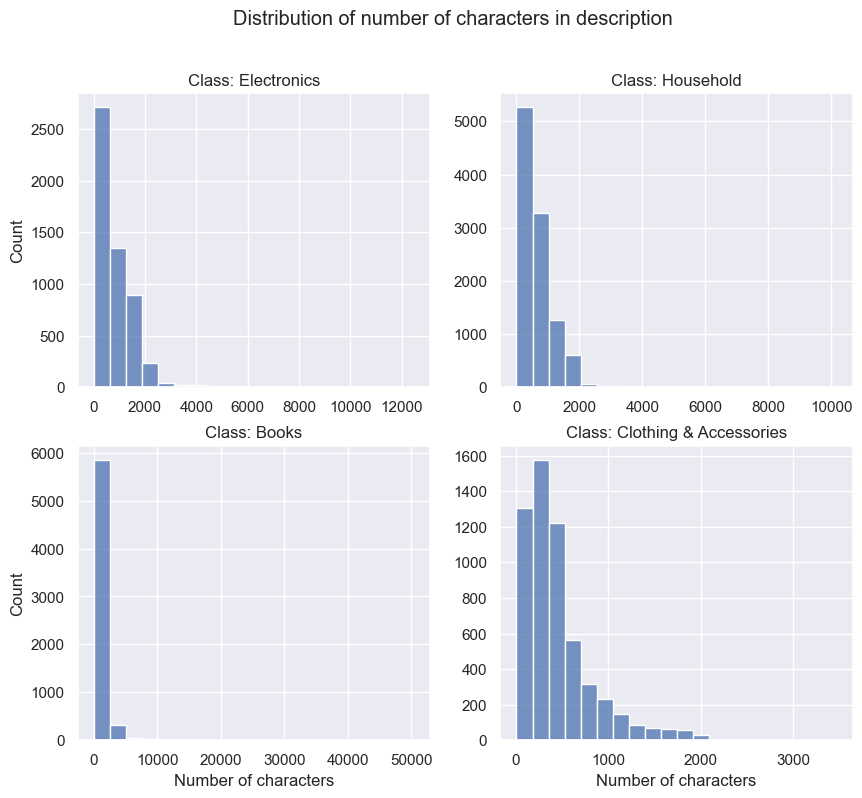

In [15]:
# Distribution of number of characters in description
data_e_char = data_e['description'].str.len()
data_h_char = data_h['description'].str.len()
data_b_char = data_b['description'].str.len()
data_c_char = data_c['description'].str.len()

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_char, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_char, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_char, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_char, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of characters in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of characters")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

## Number of Words

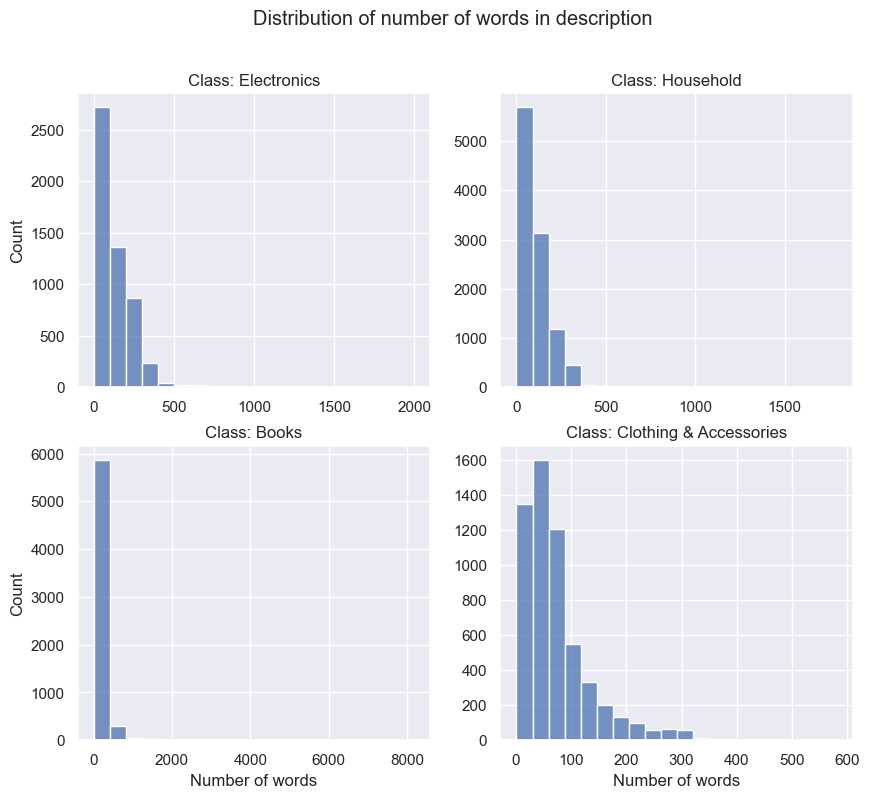

In [16]:
# Distribution of number of words in description
data_e_word = data_e['description'].str.split().map(lambda x: len(x))
data_h_word = data_h['description'].str.split().map(lambda x: len(x))
data_b_word = data_b['description'].str.split().map(lambda x: len(x))
data_c_word = data_c['description'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_word, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_word, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_word, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_word, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of words in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of words")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

## Average Word-length

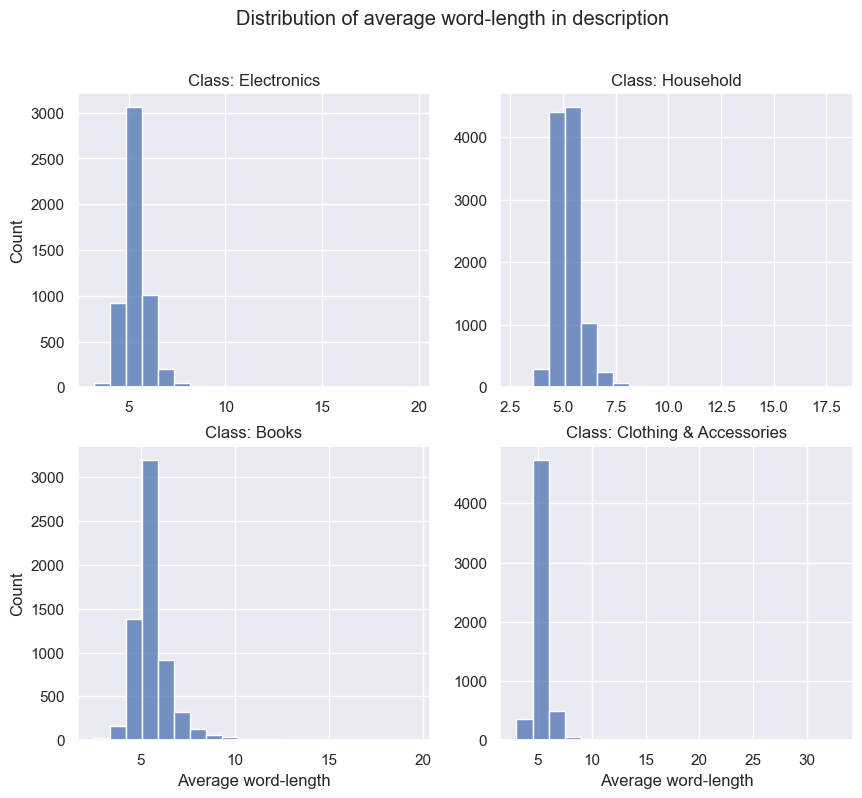

In [17]:
# Distribution of average word-length in description
data_e_avg = data_e['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_h_avg = data_h['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_b_avg = data_b['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_c_avg = data_c['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = data_e_avg, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = data_h_avg, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = data_b_avg, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = data_c_avg, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of average word-length in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

# Text Pre-processing

- **Convertion to Lowercase**
- **Removal of Whitespaces**
- **Removal of Punctuations**
- **Removal of Unicode Characters**
- **Substitution of Acronyms**
- **Substitution of Contractions**
- **Removal of Stop Words**
- **Spelling Correction**
- **Stemming and Lemmatization**
- **Discardment of Non-alphabetic Words**
- **Retainment of Relevant Parts of Speech**
- **Removal of Additional Stop Words**
- **Integration of the Processes**
- **Implementation on Product Description**

In natural language processing, **text normalization** is the process of transforming text into a single canonical form. We consider a number of text normalization processes. At the end of the section, we combine selected processes into one single function and apply it on the product descriptions.

In [19]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

### Convertion to Lowercase

We convert all alphabetical characters of the tweets to lowercase so that the models do not differentiate identical words due to case-sensitivity. For example, without the normalization, *Sun* and *sun* would have been treated as two different words, which is not useful in the present context.

In [20]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


### Removal of Whitespaces

We remove the unnecessary empty spaces from the description of the observations.

In [21]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


### Removal of Punctuations

Mostly the punctuations do not play any role in predicting whether a particular tweet indicate disaster or not. Thus we prevent them from contaminating the classification procedures by removing them from the tweets. However, we keep **apostrophe** since most of the contractions contain this punctuation and will be automatically taken care of once we convert the contractions.

In [22]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


### Removal of Unicode Characters

Webites are typically sprinkled with emojis, URLs, punctuation and other symbols that do not contribute meaningfully to our analysis, but instead create noise in the learning procedure. Some of these symbols are unique, while the rest usually translate into unicode strings. We remove these irrelevant characters from the data using the regular expression module.

In [23]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.letstrywiththissample"> Product Classification </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.letstrywiththissample"> Product Classification </a>
Output:  Product Classification 


In [24]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "The use of the equipments makes my life so much easier 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: The use of the equipments makes my life so much easier 😊
Output: The use of the equipments makes my life so much easier 


In [25]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = " Removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input:  Removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output:  Removes links starting with http: or https such as 


### Substitution of Acronyms

**Acronyms** are shortened forms of phrases, generally found in informal writings. For instance, *for your information* is written as *fyi* and *by the way* is written as *btw*. These time and effort-saving acronyms have received almost universal acceptance in recent times. For the sake of proper modeling, we convert the acronyms back to their respective original forms.

In [26]:
# Dictionary of acronyms
acronyms_dict = pd.read_json('english_acronyms.json', typ = 'series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [27]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [28]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [29]:
# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "btw have you filled the dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw have you filled the dob
Output: by the way have you filled the date of birth


### Substitution of Contractions

A **contraction** is a shortened form of a word or a phrase, obtained by dropping one or more letters.

These are commonly used in everyday speech, written dialogue, informal writing and in situations where space is limited or costly, such as advertisements. Usually the missing letters are indicated by an apostrophe, but there are exceptions. Examples: **I'm = I am**, **let's = let us**, **won't = would not**, **howdy = how do you do**.

We have compiled an extensive list of English contractions, which can be found in the attached .json file titled *english_contractions*. The list is largely based on information obtained from [**this wikipedia page**](https://en.wikipedia.org/wiki/Wikipedia:List_of_English_contractions) on *list of English contractions*. Note that the file only considers contractions in lowercase, i.e. it assumes that the textual data have already been transformed to lowercase before substituting the contractions. For example, the process will convert **i'll** to **i shall** but will leave **I'll** unchanged.

In [30]:
# Dictionary of contractions
contractions_dict = pd.read_json('english_contractions.json', typ = 'series')

print("Example: Original form 'aren't' is '{}'".format(contractions_dict["aren't"]))

Example: Original form 'aren't' is 'are not'


In [31]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


The contractions do not always have a one-to-one mapping with the original words. For example **i'd** can come from both **i had** and **i would**. In the .json file only one the original words/phrases are chosen. However, this does not affect our analysis since words like **had** and **would**, which do not have any meaningful contribution in achieving the objective of the project, will be discarded.

In [32]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [33]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "she's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: she's doin' fine
Output: she is doing fine


### Removal of Stop Words

Several words, primarily pronouns, prepositions, modal verbs etc, are identified to have much effect on the classification procedure. These are called **stop words**. To get rid of the unwanted contamination effect, we remove these words.

In [34]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


### Spelling Correction

The classification procedure cannot take mispellings into consideration and treats a word and its misspelt version as separate words. For this reason it is necessary to conduct spelling correction before feeding the data to the classification procedure.

In [36]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "I'm tolld to get its doone"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm tolld to get its doone
Output: I'm told to get its done


### Stemming and Lemmatization

**Stemming** is the process of reducing the words to their root form or **stem**. It reduces related words to the same *stem* even if the stem is not a dictionary word. For example, the words **introducing**, **introduced**, **introduction** reduce to a common word **introduce**. However, the process often produces stems that are not actual words.

In [37]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = " lemmatization often used over stemming as an introduction"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input:  lemmatization often used over stemming as an introduction
Output: lemmat often use over stem as an introduct


The stems **introduc**, **lemmat** and **improv** are not actual words. **Lemmatization** offers a more sophisticated approach by utilizing a corpus to match root forms of the words. Unlike stemming, it uses the context in which a word is being used.

In [38]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [39]:
import spacy.cli
spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [40]:
# Lemmatization
spacy_lemmatizer = spacy.load('en_core_web_lg', disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "lemmatization often used over stemming as introduced improvement"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: lemmatization often used over stemming as introduced improvement
Output: lemmatization often use over stem as introduce improvement


### Discardment of Non-alphabetic Words

The non-alphabetic words are not numerous and create unnecessary diversions in the context of classifying the data.

### Retainment of Relevant Parts of Speech

The **parts of speech** provide a great tool to select a subset of words that are more likely to contribute in the classification procedure and discard the rest to avoid noise. The idea is to select a number of parts of speech that are important to the context of the problem. Then we partition the words in a given text into several subsets corresponding to each part of speech and keep only those subsets corresponding to the selected parts of speech. 

In [42]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


### Removal of Additional Stop Words

Analyzing the data, we observe that several unnecessary words, which are not included in the ready-made set of **stop words**, keep appearing in the text corpus. We discard these words to remove noise in the classification procedure.

In [43]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

## Integration of the Processes

We integrate the text normalization processes in appropriate order. We have kept the **spelling correction** step commented out as it takes a massive amount of time to run on large datasets.

In [44]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
#     text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION
Output: combine function function


### Implementation on Pre-processing


In [45]:
%%time
# Implementing text normalization
data_normalized = pd.DataFrame()
data_normalized['normalized description'] = data['description'].apply(text_normalizer)
data_normalized['label'] = data['label']
data_normalized

CPU times: total: 8min
Wall time: 8min 2s


,normalized description,label
0,paper plane design frame wall hang office deco...,1
1,frame paint wood inch inch effect print textur...,1
2,saf uv textured art print frame paint cm cm cm...,1
3,saf flower print frame paint inch inch uv text...,1
4,gift india wooden birthday personalized gift i...,1
...,...,...
27797,micromax bharat impact displayscratch proof pr...,0
27798,lumia gb lumia experience power window price h...,0
27799,lumia gb colourblack product description defin...,0
27800,karbonn titanium titanium wind performance pow...,0


In [52]:
data_normalized['normalized description'].iloc[27100]

'protego satellite speaker ceilingwall mount bracket type mm thread hole speaker set speaker wall mount support kg position lock feature product description ideal surround home theatre speaker compromise angle speaker get sound enhance look home theatre position lock feature let lock desire position come hardware pack size speaker mm mm mm hole movement direction speaker distance wall mm load carry capacity kg class rotate position lock feature lock desire speaker position make india install speaker keyhole video link'

In [53]:
# Saving the dataframe
data_normalized.to_csv('ecommerceDataset_normalized.csv', index = False)

In [54]:
data_normalized.shape

(27802, 2)

In [55]:
data_normalized.head()

,normalized description,label
0,paper plane design frame wall hang office deco...,1
1,frame paint wood inch inch effect print textur...,1
2,saf uv textured art print frame paint cm cm cm...,1
3,saf flower print frame paint inch inch uv text...,1
4,gift india wooden birthday personalized gift i...,1


<h4><center> <span style = "font-family: Babas; font-size: 2em;"> Part 2. Text Vectorization & Baseline Modelling </span> </center></h4>

- Used **TF-IDF** vectorizer on normalized descriptions for **text vectorization**

- Used several classifiers, namely *logistic regression*, *k-nearest neighbors classifier*, *decision tree*, *support vector machine with linear kernel*, *random forest*, *stochastic gradient descent classifier*, *ridge classifier*, *XGBoost* and *AdaBoost* for **baseline modeling**

In [56]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data_normalized) - len(data_normalized.dropna()),
                 "Number of duplicate observations": data_normalized.duplicated().sum()}).to_string())

Number of observations with missing values      0
Number of duplicate observations              674


In [57]:
data_normalized.drop_duplicates(inplace = True) # Dropping duplicate observations
data_normalized.reset_index(drop = True, inplace = True) # Resetting index

In [58]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data_normalized) - len(data_normalized.dropna()),
                 "Number of duplicate observations": data_normalized.duplicated().sum()}).to_string())

Number of observations with missing values    0
Number of duplicate observations              0


### Train-Validation-Test Split


In [59]:
# Feature-target split
X, y = data_normalized.drop('label', axis = 1), data_normalized['label']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of sizes of training set and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

 **TF-IDF** (short for **term frequency-inverse document frequency**), is a numerical statistic that is intended to reflect how important a word is to a document in a collection.  The **TF-IDF** value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. The term is composed of two factors, **TF** and **IDF**.

**term frequency** **(TF)** is the relative frequency of a term within a given document. It is obtained as the number of times a word appears in a text, divided by the total number of words appearing in the text. Mathematically, it is given by

$$ \text{TF}\left(t, d\right) := \frac{f_{t, d}}{\sum_{t' \in d} f_{t', d}},$$

where $f_{t, d}$ is the number of times that term $t$ appears in the document $d$. Note that the denominator is simply the total number of terms in the document $d$, counting every instance of a given term.

**inverse document frequency**) **(IDF)** measures how common or rare a word is across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word, obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that ratio. Mathematically, it is given by

$$ \text{IDF}\left(t, D\right) := \log{\frac{N}{\left\vert \left\{ d \in D : t \in d \right\} \right\vert}},$$

where $\left\vert S \right\vert$ denotes the cardinality of the set $S$, $N$ is the total number of documents in the corpus, i.e. $N = \left\vert D \right\vert$, and the denominator $\left\vert \left\{ d \in D : t \in d \right\} \right\vert$ is the number of documents where the term $t$ appears. If $t$ is not in the corpus, then $\text{IDF}\left(t, D\right)$ will become undefined. To avoid this, the denominator is often adjusted to $1 + \left\vert \left\{ d \in D : t \in d \right\} \right\vert$. **TF-IDF is the product of the two terms TF and IDF**, i.e.

$$\text{TF-IDF}\left(t, d, D\right) := \text{TF}\left(t, d\right) \times \text{IDF}\left(t, D\right).$$

**It objectively evaluates how relevant a word is to a text in a collection of texts, taking into consideration that some words appear more frequently in general.**

**Text vectorization** is the process of converting words, sentences, or even larger units of text data to numerical vectors.

In [60]:
X_train, y_train = data_train['normalized description'].tolist(), data_train['label'].tolist()
X_val, y_val = data_val['normalized description'].tolist(), data_val['label'].tolist()
X_test, y_test = data_test['normalized description'].tolist(), data_test['label'].tolist()

In [61]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train)
X_val_tfidf = TfidfVec.transform(X_val)
X_test_tfidf = TfidfVec.transform(X_test)

### Baseline Modeling

In [62]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [63]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [ ]:
#!pip install -U threadpoolctl

In [64]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
3,Linear SVM,0.978251,0.946554
5,SGD Classifier,0.968620,0.943973
0,Logistic Regression,0.967192,0.934021
4,Random Forest,0.999862,0.923332
6,XGBoost,0.960464,0.917803
1,KNN Classifier,0.910100,0.907482
2,Decision Tree,0.999862,0.862882
7,AdaBoost,0.805686,0.795429


In [ ]:
#!pip install --user -U threadpoolctl

### Hyperparameter Tuning

Perform **hyperparameter tuning** on the best performing baseline model.

In [65]:
# Hyperparameter tuning for SVM
svm_classifier = svm.SVC()
params_svm = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100]
}

best_model_svm, best_params, best_score, count = svm_classifier, ParameterGrid(params_svm)[0], 0, 0
for g in ParameterGrid(params_svm):
    time_start = time.time()
    count += 1
    print(f"Gridpoint #{count}: {g}")
    svm_classifier.set_params(**g)
    svm_classifier.fit(X_train_tfidf, y_train)
    y_train_pred, y_val_pred = svm_classifier.predict(X_train_tfidf), svm_classifier.predict(X_val_tfidf)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score:
        best_params, best_score = g, score_val

best_model = svm.SVC()
best_model.set_params(**best_params)
print(f"Best model: {best_model}")
print(" ")
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_score}")

Gridpoint #1: {'C': 0.1, 'kernel': 'linear'}
Training accuracy: 0.9345682425582895, Validation accuracy: 0.9174345742720236, Runtime: 3m33s
 
Gridpoint #2: {'C': 1, 'kernel': 'linear'}
Training accuracy: 0.9782508524559949, Validation accuracy: 0.9465536306671581, Runtime: 2m8s
 
Gridpoint #3: {'C': 10, 'kernel': 'linear'}
Training accuracy: 0.9977421435812368, Validation accuracy: 0.9402875046074456, Runtime: 2m15s
 
Gridpoint #4: {'C': 100, 'kernel': 'linear'}
Training accuracy: 0.9993548981660676, Validation accuracy: 0.9366015481017324, Runtime: 2m11s
 
Best model: SVC(C=1, kernel='linear')
 
Best parameters: {'C': 1, 'kernel': 'linear'}
Best validation accuracy: 0.9465536306671581


In [66]:
# Function to compute and print confusion matrix
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3] # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(4), range(4))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

Test accuracy    0.953557
 


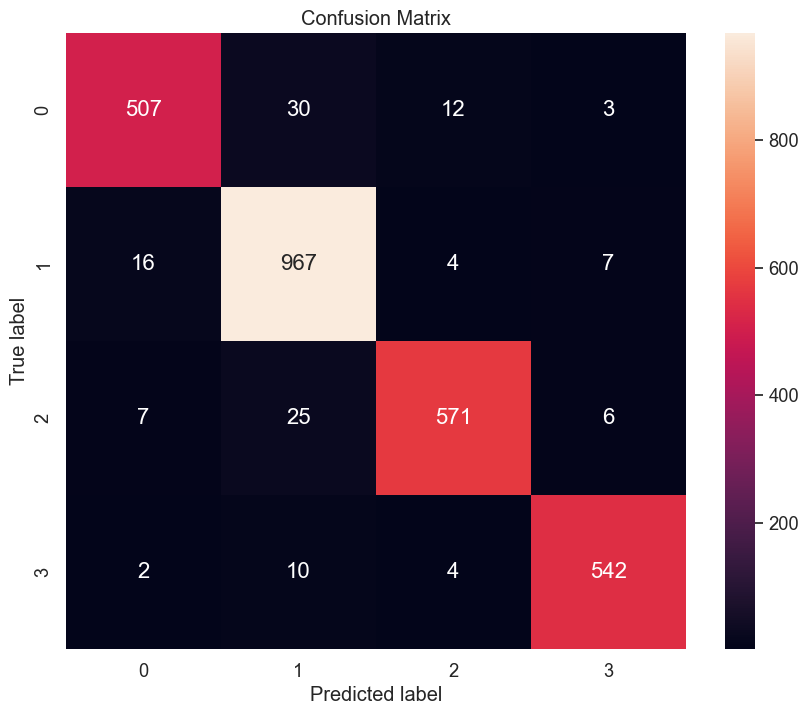

 
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       552
           1       0.94      0.97      0.95       994
           2       0.97      0.94      0.95       609
           3       0.97      0.97      0.97       558

    accuracy                           0.95      2713
   macro avg       0.96      0.95      0.95      2713
weighted avg       0.95      0.95      0.95      2713



In [67]:
# Prediction and evaluation on test set
from sklearn.metrics import classification_report

best_model.fit(X_train_tfidf, y_train)
y_test_pred = best_model.predict(X_test_tfidf)
score_test = accuracy_score(y_test, y_test_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")

conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16) # Confusion matrix
print(" ")

# classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)

In [68]:
#Sample text predictions


Text = "The reviews of the dress hanging from the side of the bodies and the shining earrings and necklace of the the gucci brand "
processed_Text = text_normalizer(Text) 
# Vectorize the processed sentence
vectorized_Text = TfidfVec.transform([processed_Text])  

# Make predictions
predicted_class = best_model.predict(vectorized_Text)

# Map predicted class to its category
class_mapping = {0: 'Electronics', 1: 'Household', 2: 'Books', 3: 'Clothing & Accessories'}
predicted_category = class_mapping[predicted_class[0]]

print(f"The predicted category for the sentence is: {predicted_category}")

The predicted category for the sentence is: Clothing & Accessories


<h4><center> <span style = "font-family: Babas; font-size: 2em;"> Part 3. Word Embeddings & Baseline Modelling </span> </center></h4>

- Used Google's pre-trained **Word2Vec** model on the tokens, obtained from the partially normalized descriptions, to get the **embeddings**

- The embeddings are then converted to **compressed sparse row** (CSR) format

- Used several classifiers, namely *logistic regression*, *k-nearest neighbors classifier*, *decision tree*, *linear support vector machine*, *naive Bayes*, *random forest*, *linear discriminant analysis classifier*, *stochastic gradient descent classifier*, *ridge classifier*, *XGBoost*, *AdaBoost*, *CatBoost*, *neural network* for **baseline modeling**

- Performed **hyperparameter tuning** 

- Employed the model with the highest validation accuracy to predict the labels of the test observations 


In [69]:
data = pd.read_csv(
    'products_kaggle.csv', 
    names = ['label', 'description']
)
data = data[['description', 'label']]

print(pd.Series({"Dataset shape": "{}".format(data.shape)}).to_string())
data

Dataset shape    (50425, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,Household
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",Household
2,SAF 'UV Textured Modern Art Print Framed' Pain...,Household
3,"SAF Flower Print Framed Painting (Synthetic, 1...",Household
4,Incredible Gifts India Wooden Happy Birthday U...,Household
...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,Electronics
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,Electronics
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,Electronics
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",Electronics


In [70]:
data.dropna(inplace = True) # Dropping observations with missing values
data.drop_duplicates(inplace = True) # Dropping duplicate observations
data.reset_index(drop = True, inplace = True) #

In [71]:
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
data.replace({'label': label_dict}, inplace = True)

print(pd.Series({"Dataset shape": "{}".format(data.shape)}).to_string())
data

Dataset shape    (27802, 2)


,description,label
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


In [72]:
X, y = data.drop('label', axis = 1), data['label']

# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)



### Pre-processing step

Standard text normalization processes like **stemming**, **lemmatization** or **removal of stop words** are not recommended when we have pre-trained embeddings. The reason behind this is that valuable information, which could be used by the neural network, is lost by those preprocessing steps. Here we shall consider a few selected text normalization processes only, before we feed the tokenized words to the pre-trained model to get the embeddings.

In [73]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [74]:
# Relevant text normalization processes
def convert_to_lowercase(text): return text.lower()
contractions_dict = pd.read_json('english_contractions.json', typ = 'series')
contractions_list = list(contractions_dict.keys())
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    return " ".join(words)


In [75]:
# Text normalization for Word2Vec
for df in [data_train, data_val, data_test]:
    df['tokens'] = (df["description"].apply(convert_to_lowercase)
                                     .apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['tokens', 'label']]

,tokens,label
15525,"[practical, approach, to, acupuncture, 1, abou...",2
1536,"[nice, goods, leatherette, office, arm, chair,...",1
21984,"[ekan, fashionable, fedora, hat, for, girls, b...",3
25056,"[techyshop, dmx512, professional, concert, sho...",0
25213,"[marantz, tt5005, fully, automatic, belt, driv...",0
...,...,...
23992,"[apple, ipad, pro, mpf12hn, a, tablet, 10, 5, ...",0
27640,"[printelligent, laptop, skins, stickers, super...",0
14501,"[the, challenger, sale, taking, control, of, t...",2
14555,"[international, mathematics, olympiad, work, b...",2


### Word2Vec Model

- **Word Embedding**
- **Baseline Modeling**
- **Hyperparameter Tuning**

**Word embeddings** are used for representing a word in terms of a real-valued vector that encodes the meaning of the word such that the words that are close in the vector space are expected to be similar in meaning. It can capture the context of a word in a document, as well as identify semantic and syntactic similarity and other contextual relations with other words in the document.

**Word2Vec** is a specific word-embedding technique that uses a neural network model to learn word associations from a reasonably large corpus of text. After training, the model can detect similar words and recommend words to complete a partial sentence. As its name suggests, word2vec maps each distinct word to a vector, which is assigned in such a way that the level of semantic similarity between words is indicated by a simple mathematical operation on the vectors that the words are mapped to (for instance, the cosine similarity between the vectors).

In [76]:
word2vecpath = r"C:\Users\USER\DERBY BDA MSC 2023-2024\NLP\PROJECT_ASSESMENTS\GoogleNews-vectors-negative300.bin 2\GoogleNews-vectors-negative300.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vecpath, binary = True)

In [77]:
# Some useful functions for Word2Vec
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

In [78]:
X_train_vec = get_word2vec_embeddings(word2vec, data_train['tokens'])
X_val_vec = get_word2vec_embeddings(word2vec, data_val['tokens'])
X_test_vec = get_word2vec_embeddings(word2vec, data_test['tokens'])

In [79]:
X_train_csr = scipy.sparse.csr_matrix(X_train_vec)
X_val_csr = scipy.sparse.csr_matrix(X_val_vec)
X_test_csr = scipy.sparse.csr_matrix(X_test_vec)

In [ ]:
#!pip install catboost
#import catboost as ctb
#from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## Baseline Modeling and Neural Network

**Neural networks or feedforward neural networks**. These have multiple layers of neurons arranged in fashion similar to that of human brain. The input feature vector is processed at each layer and then forwarded to the next hidden layer. The output for the next layer is created by multiplying the input with weight w and bias b. All of this summed up and then passed on to the activation function. I have rectified linear unit (ReLU) function. The algorithm initializes the weights and trains them using backpropagation. We reduced the error of the predicted output, it uses optimization methods like the gradient descent.

In [80]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Naive Bayes",
    "Random Forest",
    "LDA Classifier",
    "SGD Classifier",
    "XGBoost",
    "AdaBoost",
    "CatBoost",
    "Neural Network"
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    GaussianNB(),
    RandomForestClassifier(n_estimators = 100),
    LinearDiscriminantAnalysis(),
    SGDClassifier(loss = 'hinge'),
    XGBClassifier(),
    AdaBoostClassifier(),
    ctb.CatBoostClassifier(silent = True),
    "Neural Network" # To be specified in the next code block
]

In [81]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    for model in models:
        if model == "Neural Network":
            model = Sequential()
            model.add(Dense(128, input_dim = X_train.shape[-1], activation = 'relu'))
            model.add(Dense(64, activation = 'relu'))
            model.add(Dense(32, activation = 'relu'))
            model.add(Dense(16, activation = 'relu'))
            model.add(Dense(8, activation = 'relu'))
            model.add(Dense(4)) 
            model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                          optimizer = 'adam', metrics = ['accuracy'])
            model.fit(X_train.toarray(), y_train, 
                      validation_data = (X_val.toarray(), y_val), 
                      epochs = 20, batch_size = 32, verbose = 0)
            train_pred, val_pred = model.predict(X_train), model.predict(X_val)
            y_train_pred = [np.argmax(train_pred[i]) for i in range(len(train_pred))]
            y_val_pred = [np.argmax(val_pred[i]) for i in range(len(val_pred))]
        elif str(model) in ['GaussianNB()', 'LinearDiscriminantAnalysis()']:
            model.fit(X_train.toarray(), y_train)
            y_train_pred, y_val_pred = model.predict(X_train.toarray()), model.predict(X_val.toarray())
        else:
            model.fit(X_train, y_train)
            y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [82]:
score(X_train_csr, y_train, X_val_csr, y_val, names = names, models = models)





87/87 [==============================] - 0s 4ms/step


,Classifier,Training accuracy,Validation accuracy
8,XGBoost,0.999955,0.943525
10,CatBoost,0.989479,0.943165
11,Neural Network,0.978553,0.940288
3,Linear SVM,0.937233,0.934173
7,SGD Classifier,0.931073,0.931295
0,Logistic Regression,0.931613,0.929496
5,Random Forest,0.999955,0.927338
6,LDA Classifier,0.918754,0.916547
1,KNN Classifier,0.913268,0.912590
9,AdaBoost,0.864485,0.862590


### Hyperparameter Tuning

We perform **hyperparameter tuning** on the best performing model.

In [83]:
# Hyperparameter tuning for XGBoost
xgb = XGBClassifier()
params_xgb = {
    'learning_rate': [0.03, 0.3],
    'min_child_weight': [0, 10],
    'n_estimators': [200],
    'reg_lambda': [1, 2],
    'seed': [40]
}

best_model_xgb, best_params, best_score, count = xgb, ParameterGrid(params_xgb)[0], 0, 0
for g in ParameterGrid(params_xgb):
    time_start = time.time()
    count += 1
    print(f"Gridpoint #{count}: {g}")
    xgb.set_params(**g)
    xgb.fit(X_train_csr, y_train)
    y_train_pred, y_val_pred = xgb.predict(X_train_csr), xgb.predict(X_val_csr)
    score_train, score_val = accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)
    time_stop = time.time()
    m, s = int(time_stop - time_start) // 60, int(time_stop - time_start) % 60
    print(f"Training accuracy: {score_train}, Validation accuracy: {score_val}, Runtime: {m}m{s}s")
    print(" ")
    if score_val > best_score:
        best_params, best_score = g, score_val

best_model = XGBClassifier()
best_model.set_params(**best_params)
print(f"Best model: {best_model}")
print(" ")
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_score}")

Gridpoint #1: {'learning_rate': 0.03, 'min_child_weight': 0, 'n_estimators': 200, 'reg_lambda': 1, 'seed': 40}
Training accuracy: 0.9729328717233937, Validation accuracy: 0.9316546762589928, Runtime: 2m22s
 
Gridpoint #2: {'learning_rate': 0.03, 'min_child_weight': 0, 'n_estimators': 200, 'reg_lambda': 2, 'seed': 40}
Training accuracy: 0.9718537835528978, Validation accuracy: 0.9320143884892086, Runtime: 2m23s
 
Gridpoint #3: {'learning_rate': 0.03, 'min_child_weight': 10, 'n_estimators': 200, 'reg_lambda': 1, 'seed': 40}
Training accuracy: 0.9689762150982419, Validation accuracy: 0.9309352517985612, Runtime: 2m8s
 
Gridpoint #4: {'learning_rate': 0.03, 'min_child_weight': 10, 'n_estimators': 200, 'reg_lambda': 2, 'seed': 40}
Training accuracy: 0.96794208893485, Validation accuracy: 0.9323741007194245, Runtime: 2m7s
 
Gridpoint #5: {'learning_rate': 0.3, 'min_child_weight': 0, 'n_estimators': 200, 'reg_lambda': 1, 'seed': 40}
Training accuracy: 0.999955037992896, Validation accuracy: 0

In [84]:
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3] # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(4), range(4))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

Test accuracy    0.940669
 


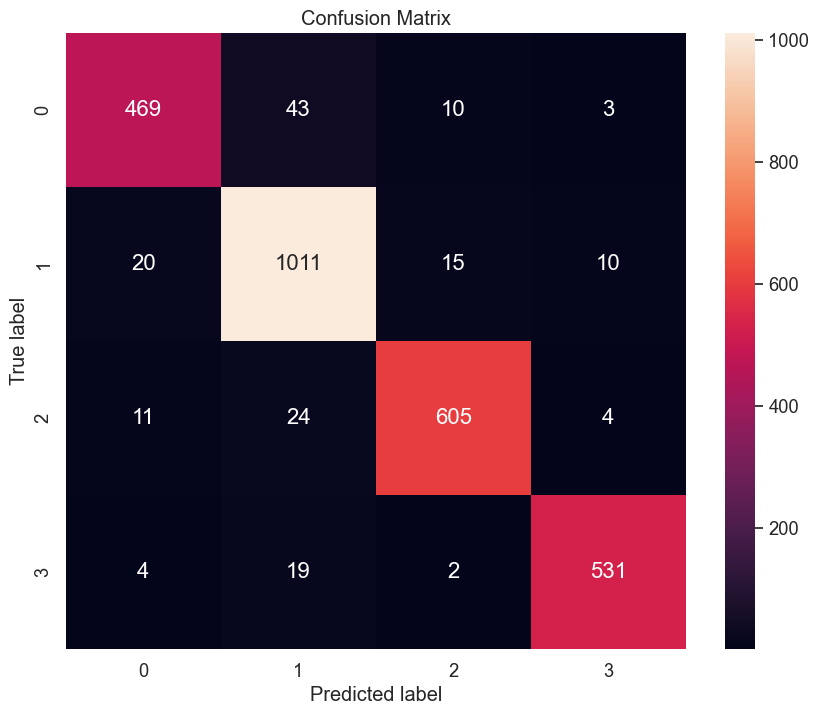

 
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       525
           1       0.92      0.96      0.94      1056
           2       0.96      0.94      0.95       644
           3       0.97      0.96      0.96       556

    accuracy                           0.94      2781
   macro avg       0.94      0.94      0.94      2781
weighted avg       0.94      0.94      0.94      2781



In [85]:
best_model.fit(X_train_csr, y_train)
y_test_pred = best_model.predict(X_test_csr)
score_test = accuracy_score(y_test, y_test_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")
conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16) # Confusion matrix
print(" ")
# classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)